# **<span style="color:blue">Desafío 6 -  Identificación de escenarios naturales del mundo</span>**

### **<span style="color:orange">Punto 1.- Exploración y Preprocesamiento del Dataset de Imágenes</span>**

El código tiene como objetivo **cargar, explorar y preprocesar** un conjunto de datos de imágenes para entrenar modelos de **redes neuronales convolucionales (CNN)**. 

**Objetivos del Código**

- **Cargar los datos** desde archivos **.npy**, que contienen imágenes de seis categorías de escenarios naturales.
- **Explorar la distribución de clases** en los conjuntos de entrenamiento y prueba.
- **Codificar las etiquetas** utilizando **One-Hot Encoding**, un formato requerido para redes neuronales.
- **Visualizar imágenes aleatorias** del conjunto de entrenamiento para verificar la calidad de los datos.

**Descripción de los Datos**

El conjunto de datos contiene imágenes de seis clases distintas:
- **Buildings** (Edificios)
- **Forest** (Bosque)
- **Glacier** (Glaciar)
- **Mountain** (Montaña)
- **Sea** (Mar)
- **Street** (Calle)

Los datos están divididos en:
- **cnn_train_X.npy**: Imágenes de entrenamiento.
- **cnn_train_y.npy**: Etiquetas correspondientes a las imágenes de entrenamiento.
- **cnn_test_X.npy**: Imágenes para prueba.
- **cnn_test_y.npy**: Etiquetas correspondientes a las imágenes de prueba.
- **cnn_pred_X.npy**: Imágenes sin etiqueta destinadas a predicción.

**Pasos para el Código**

1. **Carga los datos** usando **numpy.load()**, permitiendo manipularlos como arreglos NumPy.
2. **Cuenta y muestra la cantidad de imágenes** en cada clase en los conjuntos de entrenamiento y prueba.
3. **Convierte las etiquetas a One-Hot Encoding** utilizando **OneHotEncoder** de **sklearn.preprocessing**.
4. **Selecciona y muestra 8 imágenes aleatorias** del conjunto de entrenamiento.

Este paso es fundamental para asegurar que los datos están bien estructurados antes de entrenar modelos de **redes neuronales convolucionales (CNN)**. 

In [2]:
"""
Este código realiza la importación, exploración y preprocesamiento de un conjunto de datos de imágenes
para entrenar redes neuronales convolucionales. El conjunto de datos contiene imágenes de seis clases diferentes 
de escenarios naturales. 

El proceso incluye:
1. Carga de los conjuntos de datos desde archivos .npy
2. Exploración de la distribución de clases en los datos de entrenamiento y prueba
3. Codificación de las etiquetas en formato One-Hot Encoding
4. Visualización de algunas imágenes del conjunto de entrenamiento
"""
# ==========================================================
# IMPORTACIÓN DE LIBRERÍAS NECESARIAS
# ==========================================================

# Manejo de datos
import numpy as np
import pandas as pd

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Preprocesamiento y evaluación
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Deep Learning con TensorFlow / Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, 
    GlobalAveragePooling2D, LeakyReLU)

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# =============================================
# 1. Cargar los datos desde archivos .npy
# =============================================

# Estos archivos contienen imágenes en arrays NumPy y etiquetas de clasificación
# Cada imagen está representada como un array numérico que contiene información de píxeles
train_X = np.load(r"C:\Users\atapi\Documents\DATA SCIENCE\Modulo 6- Redes neuronales\Procesamiento y redes recurrentes I\desafio\Apoyo Desafío - Procesamiento y redes recurrentes (Parte I)\DataSet\cnn_train_X.npy", allow_pickle=True)
train_y = np.load(r"C:\Users\atapi\Documents\DATA SCIENCE\Modulo 6- Redes neuronales\Procesamiento y redes recurrentes I\desafio\Apoyo Desafío - Procesamiento y redes recurrentes (Parte I)\DataSet\cnn_train_y.npy", allow_pickle=True)
test_X = np.load(r"C:\Users\atapi\Documents\DATA SCIENCE\Modulo 6- Redes neuronales\Procesamiento y redes recurrentes I\desafio\Apoyo Desafío - Procesamiento y redes recurrentes (Parte I)\DataSet\cnn_test_X.npy", allow_pickle=True)
test_y = np.load(r"C:\Users\atapi\Documents\DATA SCIENCE\Modulo 6- Redes neuronales\Procesamiento y redes recurrentes I\desafio\Apoyo Desafío - Procesamiento y redes recurrentes (Parte I)\DataSet\cnn_test_y.npy", allow_pickle=True)
pred_X = np.load(r"C:\Users\atapi\Documents\DATA SCIENCE\Modulo 6- Redes neuronales\Procesamiento y redes recurrentes I\desafio\Apoyo Desafío - Procesamiento y redes recurrentes (Parte I)\DataSet\cnn_pred_X.npy", allow_pickle=True)
print(f"- Número total de imágenes en entrenamiento: {train_X.shape[0]}")
print(f"- Número total de imágenes en test: {test_X.shape[0]}")
print(f"- Número total de imágenes para predicción: {pred_X.shape[0]}")

- Número total de imágenes en entrenamiento: 14034
- Número total de imágenes en test: 3000
- Número total de imágenes para predicción: 7301


In [3]:
# =============================================
# 2. Contar la cantidad de imágenes por clase
# =============================================

# Contar la cantidad de imágenes por categoría en los conjuntos de entrenamiento y prueba
unique_train, counts_train = np.unique(train_y, return_counts=True)  # Clases y conteo en entrenamiento
unique_test, counts_test = np.unique(test_y, return_counts=True)  # Clases y conteo en test

# Crear un DataFrame con la cantidad de imágenes por clase
df_categorias = pd.DataFrame({'Clase': unique_train, 'Cantidad Entrenamiento': counts_train})

# Asegurar que todas las clases estén presentes en la tabla, incluyendo clases no presentes en el test
df_categorias = df_categorias.set_index("Clase")  # Establecemos la columna "Clase" como índice
df_categorias["Cantidad Test"] = 0  # Inicializamos todas las clases con 0 en test
for clase, count in zip(unique_test, counts_test):
    df_categorias.loc[clase, "Cantidad Test"] = count  # Asignamos los valores correctos
df_categorias = df_categorias.reset_index()  # Restauramos el índice numérico

# Mostrar la distribución de clases en los conjuntos de datos
print("\nDistribución de Clases en los Conjuntos de Entrenamiento y Test:\n")
display(df_categorias)


Distribución de Clases en los Conjuntos de Entrenamiento y Test:



,Clase,Cantidad Entrenamiento,Cantidad Test
0,buildings,2191,437
1,forest,2271,474
2,glacier,2404,553
3,mountain,2512,525
4,sea,2274,510
5,street,2382,501



Ejemplo de etiquetas codificadas:


,Original Label,Class_0,Class_1,Class_2,Class_3,Class_4,Class_5
0,forest,0.0,1.0,0.0,0.0,0.0,0.0
1,forest,0.0,1.0,0.0,0.0,0.0,0.0
2,forest,0.0,1.0,0.0,0.0,0.0,0.0
3,forest,0.0,1.0,0.0,0.0,0.0,0.0
4,forest,0.0,1.0,0.0,0.0,0.0,0.0


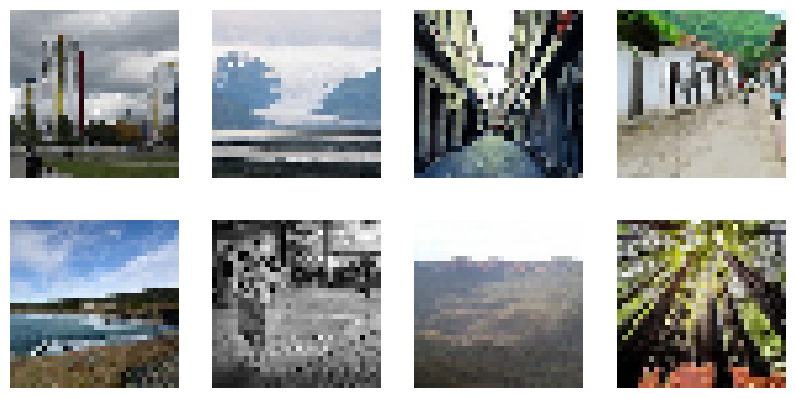

In [4]:
# =============================================
# 3. Codificar las etiquetas con One-Hot Encoding
# =============================================

# Inicializar el codificador One-Hot
# Este proceso convierte las etiquetas de clase en vectores binarios, donde cada clase es representada por una posición en un vector.
encoder = OneHotEncoder(sparse_output=False)  # Usamos sparse_output=False para obtener un array denso, es decir, cada dato se almacena explícitamente, incluyendo los ceros.

# Aplicar el codificador a las etiquetas de entrenamiento y prueba
train_y_encoded = encoder.fit_transform(train_y.reshape(-1, 1))  # Transformar etiquetas de entrenamiento
test_y_encoded = encoder.transform(test_y.reshape(-1, 1))  # Transformar etiquetas de prueba

# Crear un DataFrame para visualizar la transformación de etiquetas
df_encoded_labels = pd.DataFrame(
    data=train_y_encoded[:5],  # Tomamos las primeras 5 etiquetas codificadas
    columns=[f"Class_{i}" for i in range(train_y_encoded.shape[1])])  # Nombramos las columnas según la clase

df_encoded_labels.insert(0, "Original Label", train_y[:5])  # Agregamos la columna con las etiquetas originales

# Mostrar la transformación de etiquetas en formato tabular
print("\nEjemplo de etiquetas codificadas:")
display(df_encoded_labels)

# =============================================
# 4. Seleccionar 8 imágenes aleatorias y visualizarlas
# =============================================

# Seleccionar aleatoriamente 8 imágenes del conjunto de entrenamiento
indices = np.random.choice(train_X.shape[0], 8, replace=False)

# Crear una figura para visualizar las imágenes
fig, axes = plt.subplots(2, 4, figsize=(10, 5))  # 2 filas x 4 columnas

# Recorrer los 8 índices seleccionados y mostrar cada imagen en su posición correspondiente
for i, ax in enumerate(axes.flat):
    ax.imshow(train_X[indices[i]])  # Mostrar la imagen correspondiente
    ax.axis("off")  # Ocultar los ejes para una visualización más limpia

# Mostrar la figura con las imágenes seleccionadas
plt.show()



#### **<span style="color:purple">Resumen del Preprocesamiento de Datos</span>**

**<span style="color:teal">Cantidad de Imágenes en Cada Conjunto</span>**

El conjunto de datos se compone de las siguientes imágenes:

- **Entrenamiento**: **14,034 imágenes** - Se usarán para entrenar la red neuronal.
- **Test**: **3,000 imágenes** - Se utilizarán para evaluar el rendimiento del modelo.
- **Predicción**: **7,301 imágenes** - Imágenes sin etiquetas que serán clasificadas después del entrenamiento.

Esto indica que el conjunto de datos tiene un tamaño considerable, lo que puede contribuir a un buen desempeño del modelo al contar con una cantidad variada de ejemplos.


**<span style="color:teal">Distribución de Clases en los Conjuntos de Datos</span>**

| **Clase**    | **Cantidad en Entrenamiento** | **Cantidad en Test** |
|-------------|------------------------------|---------------------|
| **Buildings**  | 2,191  | 437 |
| **Forest**     | 2,271  | 474 |
| **Glacier**     | 2,404  | 553 |
| **Mountain**    | 2,512  | 525 |
| **Sea**        | 2,274  | 510 |
| **Street**     | 2,382  | 501 |

- La cantidad de imágenes por clase está **relativamente equilibrada**, sin grandes desbalances.  
- El conjunto de prueba también tiene una **distribución similar** al de entrenamiento.  

Esto es importante porque un dataset balanceado permite que el modelo aprenda a clasificar todas las clases de manera equitativa, sin favorecer unas sobre otras.


**<span style="color:teal">Codificación de Etiquetas en One-Hot Encoding</span>**

Las etiquetas de las imágenes han sido transformadas en formato **One-Hot Encoding**, que es requerido para entrenar una red neuronal.

**Ejemplo de las primeras 5 imágenes:**

| **Etiqueta Original** | **Class_0 (buildings)** | **Class_1 (forest)** | **Class_2 (glacier)** | **Class_3 (mountain)** | **Class_4 (sea)** | **Class_5 (street)** |
|-----------------------|------------------------|----------------------|----------------------|----------------------|----------------------|----------------------|
| **forest**           | 0.0  | **1.0**  | 0.0  | 0.0  | 0.0  | 0.0  |
| **forest**           | 0.0  | **1.0**  | 0.0  | 0.0  | 0.0  | 0.0  |
| **forest**           | 0.0  | **1.0**  | 0.0  | 0.0  | 0.0  | 0.0  |
| **forest**           | 0.0  | **1.0**  | 0.0  | 0.0  | 0.0  | 0.0  |
| **forest**           | 0.0  | **1.0**  | 0.0  | 0.0  | 0.0  | 0.0  |

Cada imagen es representada por un **vector binario** en el que solo la posición correspondiente a su clase tiene el valor **'1'**, mientras que las demás posiciones contienen **'0'**.  

Por ejemplo, en este caso todas las primeras 5 imágenes pertenecen a la categoría **"forest"**, por lo que tienen un **'1'** en la columna de **Class_1** y **'0'** en las demás.


**<span style="color:teal">Visualización de Imágenes Aleatorias</span>**

Se han seleccionado y mostrado **8 imágenes aleatorias** del conjunto de entrenamiento.  

Esto ayuda a:

- **Visualizar ejemplos reales de las imágenes del dataset.**  
- **Detectar posibles problemas en los datos, como imágenes mal clasificadas o baja calidad.**  

Las imágenes se presentan en una cuadrícula de **2 filas x 4 columnas**, eliminando los ejes para mejorar la visualización.

---

**El preprocesamiento de los datos se ha realizado correctamente, asegurando que los datos están listos para el entrenamiento de una red neuronal.**

**Pasos completados:**
- **Carga de imágenes y etiquetas** desde archivos **.npy**.  
- **Conteo y distribución de las clases** en los conjuntos de entrenamiento y prueba.  
- **Codificación de etiquetas en formato One-Hot** para que sean compatibles con la red neuronal.  
- **Visualización de imágenes aleatorias** para verificar la calidad de los datos.

---
---

### **<span style="color:orange">Punto 2.- Implementación de una Red Neuronal Fully Connected (MLP) para Clasificación de Imágenes</span>**

Este código implementa el entrenamiento y evaluación de una **red neuronal profunda** (DNN) para la clasificación de imágenes de escenarios naturales en seis categorías: **buildings (edificios), forest (bosque), glacier (glaciar), mountain (montaña), sea (mar) y street (calle)**. Se utiliza un enfoque basado en **TensorFlow y Keras**, con técnicas de regularización y ajuste de hiperparámetros para mejorar el rendimiento del modelo.


#### **<span style="color:teal">Explicación del Código</span>**

**1. Normalización de Datos**

```python
train_X_norm = train_X
test_X_norm = test_X
```
Aquí asignamos los conjuntos de entrenamiento y prueba a nuevas variables para una posible normalización posterior. En este caso, **los datos ya están preparados, por lo que no se aplica transformación adicional**.

**2. Obtención de los Nombres de Clases**

```python
unique_classes = encoder.categories_[0]
```

Se extraen los nombres de las categorías desde el objeto **encoder** que previamente se utilizó para realizar **One-Hot Encoding** de las etiquetas.

**3. Definición de la Arquitectura del Modelo**

```python
model = Sequential([
    Flatten(input_shape=train_X.shape[1:]),  

    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),  

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(train_y_encoded.shape[1], activation='softmax')])
```

Esta red neuronal utiliza **capas densas completamente conectadas**, con la activación **ReLU** en todas las capas ocultas y **Softmax** en la capa de salida para la clasificación multiclase.

- **BatchNormalization()** ayuda a estabilizar y acelerar el entrenamiento.
- **Dropout(0.1)** previene sobreajuste eliminando aleatoriamente algunas neuronas en cada iteración.

**4. Compilación del Modelo**

```python
model.compile(optimizer=Adam(learning_rate=0.0003),  
              loss='categorical_crossentropy',
              metrics=['accuracy'])
```

Se usa el **optimizador Adam** con una tasa de aprendizaje reducida para lograr una mejor precisión en la clasificación y se establece la **pérdida categórica cruzada** (**categorical_crossentropy**) como métrica de evaluación.

**5. Entrenamiento del Modelo**

```python
history = model.fit(train_X, train_y_encoded, epochs=100, batch_size=64,
                    validation_data=(test_X, test_y_encoded), verbose=1)
```
El modelo es entrenado por **100 épocas** con un **tamaño de batch de 64** imágenes. Se realiza validación con los datos de prueba para monitorear su desempeño.

**6. Evaluación del Modelo**

```python
test_loss, test_accuracy = model.evaluate(test_X, test_y_encoded, verbose=0)
```
Se mide la **pérdida y precisión** del modelo en los datos de prueba.

**7. Generación de Predicciones**

```python
y_pred = model.predict(test_X)
y_pred_labels = np.argmax(y_pred, axis=1)
test_y_labels = np.argmax(test_y_encoded, axis=1)
```
Se realizan predicciones en el conjunto de prueba y se convierten los resultados de **One-Hot Encoding** a sus etiquetas originales para evaluar el rendimiento del modelo.

**8. Matriz de Confusión**

```python
conf_matrix = confusion_matrix(test_y_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
plt.show()
```
Se genera una **matriz de confusión** para visualizar el rendimiento de la clasificación por categoría.

**9. Análisis de la Evolución del Entrenamiento**

```python
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 5))

# **Gráfico de la pérdida**
plt.subplot(1, 2, 1)
plt.plot(loss, label='Pérdida Entrenamiento')
plt.plot(val_loss, label='Pérdida Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolución de la Pérdida')
plt.legend()

# **Gráfico de la precisión**
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Precisión Entrenamiento')
plt.plot(val_accuracy, label='Precisión Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Evolución de la Precisión')
plt.legend()

plt.show()
```
Se grafican las curvas de **pérdida y precisión** para evaluar la evolución del entrenamiento y detectar posibles problemas de sobreajuste.

**10. Reporte de Clasificación**

```python
classification_rep = classification_report(test_y_labels, y_pred_labels,
                                           target_names=unique_classes, output_dict=True)
df_classification_report = pd.DataFrame(classification_rep).transpose()
print("Reporte de Clasificación:")
display(df_classification_report)
```
Se genera un **informe detallado de precisión, recall y F1-score** para cada clase, permitiendo analizar el rendimiento de la red en cada categoría.

**11. Métricas Finales**

```python
print(f"\nPrecisión Promedio (Macro): {classification_rep['accuracy']:.4f}")
print(f"Precision (Macro): {classification_rep['macro avg']['precision']:.4f}")
print(f"Recall (Macro): {classification_rep['macro avg']['recall']:.4f}")
print(f"F1-score (Macro): {classification_rep['macro avg']['f1-score']:.4f}")

print(f"\nPérdida en test: {test_loss:.4f}")
print(f"Precisión en test: {test_accuracy:.4f}")
```
Finalmente, se imprimen las **métricas globales** del modelo para evaluar su rendimiento final.

---

Este código implementa un modelo de **red neuronal profunda** optimizada con técnicas de normalización y regularización. Se realizan evaluaciones mediante **matriz de confusión, gráficos de entrenamiento y métricas de clasificación**, asegurando un análisis completo del desempeño del modelo.



In [6]:
# Verificar los valores mínimos y máximos en los datos antes de la normalización
# Esto es importante para entender el rango de valores y decidir qué técnica de normalización aplicar.

print("Valores mínimos y máximos antes de normalizar:")

# Mostrar el valor mínimo y máximo de las imágenes en el conjunto de entrenamiento
# Esto nos permite ver si los valores están en un rango adecuado (ej. 0-255 en imágenes en escala de grises o RGB).
print(f"Train X min: {train_X.min()}, max: {train_X.max()}")

# Mostrar el valor mínimo y máximo de las imágenes en el conjunto de prueba
# Comprobar si los valores son consistentes con los del conjunto de entrenamiento.
print(f"Test X min: {test_X.min()}, max: {test_X.max()}")

Valores mínimos y máximos antes de normalizar:
Train X min: 0.0, max: 1.0
Test X min: 0.0, max: 1.0


#### **<span style="color:teal">Explicación del Resultado</span>**

El mensaje **"Valores mínimos y máximos antes de normalizar"** muestra que los valores de los conjuntos de entrenamiento y prueba están dentro del rango **0.0 a 1.0**. Esto indica que los datos ya han sido **normalizados previamente**.

**¿Qué significa este resultado?**

1. **Los valores ya están escalados entre 0 y 1**
   - Esto suele lograrse dividiendo los valores originales (por ejemplo, en imágenes RGB con valores de 0 a 255) entre 255:
     ```
     X_normalizado = X / 255
     ```
   - En este caso, los datos ya han sido preprocesados para que el modelo aprenda mejor y con más estabilidad.

2. **No es necesario volver a normalizar los datos**
   - Si los valores estuvieran en otro rango (como 0-255), habría que aplicar una normalización manualmente.
   - Aquí, los datos ya están listos para ser usados directamente en la red neuronal.

3. **Evita problemas numéricos en el entrenamiento**
   - Trabajar con valores en un rango pequeño ayuda a que la red neuronal **converja más rápido** y evita inestabilidad en los cálculos de gradientes.


In [8]:
# ==========================================================
# PREPROCESAMIENTO DE DATOS
# ==========================================================

# No aplicamos normalización adicional, ya que en el paso previo 
# se confirmó que los valores de train_X y test_X están en el rango [0,1].
train_X_norm = train_X
test_X_norm = test_X

# Extraemos las categorías de etiquetas desde el One-Hot Encoder
# Esto nos permite saber el número de clases en el dataset
unique_classes = encoder.categories_[0]  # Lista de clases únicas

# ==========================================================
# DEFINICIÓN DE LA ARQUITECTURA DEL MODELO
# ==========================================================

# Creamos un modelo secuencial
model = Sequential([
    # Entrada: Convertimos las imágenes en un vector unidimensional
    Flatten(input_shape=train_X.shape[1:]),

    # Primera capa oculta con 1024 neuronas, activación ReLU y normalización por lotes
    Dense(1024, activation='relu'),
    BatchNormalization(),  # Normalización para mejorar estabilidad en el aprendizaje
    Dropout(0.1),  # Dropout para reducir el sobreajuste

    # Segunda capa oculta con 512 neuronas
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    # Tercera capa oculta con 256 neuronas
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),

    # Capas adicionales con menos neuronas para refinar la representación de datos
    Dense(128, activation='relu'),  # Capa intermedia para reducir dimensiones
    Dense(64, activation='relu'),   # Capa más pequeña para abstracción de características
    Dense(32, activation='relu'),   # Última capa antes de la salida
    
    # Capa de salida con tantas neuronas como clases en el dataset y activación softmax
    Dense(train_y_encoded.shape[1], activation='softmax')])

# ==========================================================
# COMPILACIÓN DEL MODELO
# ==========================================================

# Se utiliza Adam como optimizador con una tasa de aprendizaje reducida para evitar oscilaciones
model.compile(optimizer=Adam(learning_rate=0.0003),
              loss='categorical_crossentropy',  # Función de pérdida para clasificación multiclase
              metrics=['accuracy'])  # Se medirá la precisión como métrica de evaluación

# ==========================================================
# ENTRENAMIENTO DEL MODELO
# ==========================================================

# Entrenamos el modelo por 100 épocas con lotes de 64 imágenes
history = model.fit(
    train_X, train_y_encoded, 
    epochs=100, 
    batch_size=64,  # Tamaño del lote para actualizar pesos en cada iteración
    validation_data=(test_X, test_y_encoded),  # Datos de validación para monitorear rendimiento
    verbose=1)  # Mostrar información en cada época


# ==========================================================
# EVALUACIÓN DEL MODELO
# ==========================================================

# Evaluamos el modelo en el conjunto de prueba para obtener pérdida y precisión final
test_loss, test_accuracy = model.evaluate(test_X, test_y_encoded, verbose=0)

# ==========================================================
# GENERACIÓN DE PREDICCIONES
# ==========================================================

# Se generan predicciones en el conjunto de prueba
y_pred = model.predict(test_X)

# Extraemos la clase con mayor probabilidad para cada imagen (índice de mayor valor en softmax)
y_pred_labels = np.argmax(y_pred, axis=1)

# Convertimos las etiquetas One-Hot a sus valores originales para comparación
test_y_labels = np.argmax(test_y_encoded, axis=1)

C:\Users\atapi\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.4441 - loss: 1.4449 - val_accuracy: 0.5210 - val_loss: 1.2338
Epoch 2/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5764 - loss: 1.1088 - val_accuracy: 0.5093 - val_loss: 1.3092
Epoch 3/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6156 - loss: 1.0177 - val_accuracy: 0.4550 - val_loss: 1.4481
Epoch 4/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6320 - loss: 0.9752 - val_accuracy: 0.4570 - val_loss: 1.4832
Epoch 5/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6481 - loss: 0.9268 - val_accuracy: 0.4253 - val_loss: 1.5454
Epoch 6/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6605 - loss: 0.8911 - val_accuracy: 0.5053 - val_loss: 1.2938
Epoch 7/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6847 - loss: 0.8516 - val_accuracy: 0.4670 - val_loss: 1.4503
Epoch 8/100
220/220 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6875 - loss: 0.8253 - 

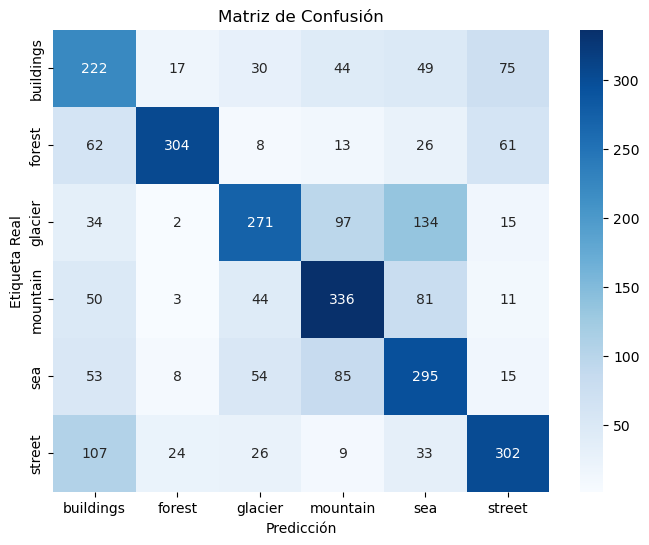

In [9]:
# Generamos la matriz de confusión para visualizar errores de clasificación
conf_matrix = confusion_matrix(test_y_labels, y_pred_labels)

# Graficamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión")
plt.show()


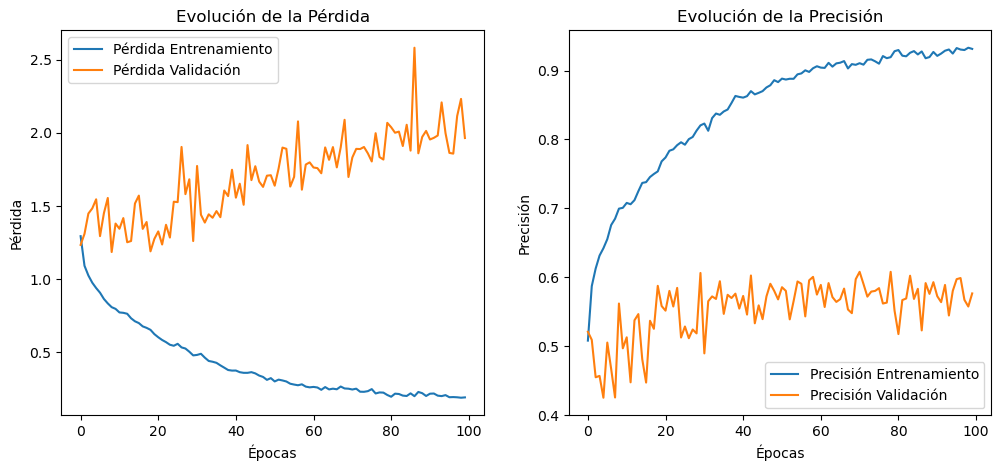

In [10]:
# Extraemos la evolución de pérdida y precisión
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 5))

# Gráfico de la pérdida
plt.subplot(1, 2, 1)
plt.plot(loss, label='Pérdida Entrenamiento')
plt.plot(val_loss, label='Pérdida Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolución de la Pérdida')
plt.legend()

# Gráfico de la precisión
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Precisión Entrenamiento')
plt.plot(val_accuracy, label='Precisión Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Evolución de la Precisión')
plt.legend()

plt.show()



In [11]:
# Generamos un reporte detallado de precisión, recall y F1-score para cada clase
target_names = unique_classes
classification_rep = classification_report(test_y_labels, y_pred_labels, target_names=target_names, output_dict=True)

# Convertimos el reporte en un DataFrame para mejor visualización
df_classification_report = pd.DataFrame(classification_rep).transpose()
print("Reporte de Clasificación:")
display(df_classification_report)

# Imprimimos métricas globales del modelo
print(f"\nPrecisión Promedio (Macro): {classification_rep['accuracy']:.4f}")
print(f"Precision (Macro): {classification_rep['macro avg']['precision']:.4f}")
print(f"Recall (Macro): {classification_rep['macro avg']['recall']:.4f}")
print(f"F1-score (Macro): {classification_rep['macro avg']['f1-score']:.4f}")

print(f"\nPérdida en test: {test_loss:.4f}")
print(f"Precisión en test: {test_accuracy:.4f}")


Reporte de Clasificación:


,precision,recall,f1-score,support
buildings,0.420455,0.508009,0.460104,437.000000
forest,0.849162,0.641350,0.730769,474.000000
glacier,0.625866,0.490054,0.549696,553.000000
mountain,0.575342,0.640000,0.605951,525.000000
sea,0.477346,0.578431,0.523050,510.000000
street,0.630480,0.602794,0.616327,501.000000
accuracy,0.576667,0.576667,0.576667,0.576667
macro avg,0.596442,0.576773,0.580983,3000.000000
weighted avg,0.597906,0.576667,0.581697,3000.000000



Precisión Promedio (Macro): 0.5767
Precision (Macro): 0.5964
Recall (Macro): 0.5768
F1-score (Macro): 0.5810

Pérdida en test: 1.9643
Precisión en test: 0.5767


#### **<span style="color:purple">Resultados Red Neuronal Fully Connected (MLP) para Clasificación de Imágenes</span>**

**<span style="color:teal">Análisis de la Matriz de Confusión</span>**

La matriz de confusión obtenida muestra el desempeño del modelo en la clasificación de imágenes en seis categorías: **buildings (edificios), forest (bosque), glacier (glaciar), mountain (montaña), sea (mar) y street (calle)**.

Cada celda en la matriz representa la cantidad de ejemplos en los cuales una clase real (fila) fue clasificada como otra clase (columna).

**1. Interpretación de la Diagonal Principal**
- La **diagonal principal** contiene los valores donde el modelo clasificó correctamente las imágenes en su categoría respectiva.
- **Ejemplos correctos por clase:**
    - **Buildings:** 222 imágenes correctamente clasificadas.
    - **Forest:** 304 imágenes correctamente clasificadas.
    - **Glacier:** 271 imágenes correctamente clasificadas.
    - **Mountain:** 336 imágenes correctamente clasificadas.
    - **Sea:** 295 imágenes correctamente clasificadas.
    - **Street:** 302 imágenes correctamente clasificadas.

**<span style="color:navy">Cuanto más altos sean estos valores, mejor es el desempeño del modelo en cada clase.</span>**

**2. Erores Comunes (Celdas Fuera de la Diagonal)**
Los valores fuera de la diagonal indican errores de clasificación, es decir, cuando el modelo predijo una categoría incorrecta.

- **Ejemplos de errores destacados:**
    - **Buildings mal clasificados como street (75) y sea (49)** - Posible confusión con estructuras urbanas y paisajes costeros.
    - **Glacier mal clasificado como mountain (97) y sea (134)** - Indica similitudes visuales entre glaciares, montañas y el mar.
    - **Street mal clasificado como buildings (107)** - Posiblemente debido a la presencia de edificios en imágenes de calles.
**Estos errores pueden indicar que algunas clases tienen características visuales similares, lo que dificulta su diferenciación para el modelo.**


**Conclusión**

- El modelo **funciona bien en general**, con un número considerable de predicciones correctas en la diagonal principal.
- Sin embargo, hay confusión entre ciertas clases, especialmente **glaciares con montañas y mar, y calles con edificios**.
- Para mejorar, se puede aplicar **data augmentation, ajuste de arquitectura y balanceo de datos**.

---

**<span style="color:teal">Análisis de las Curvas de Pérdida y Precisión</span>**

Los gráficos muestran la **evolución de la pérdida y la precisión** durante el entrenamiento y validación del modelo.

**Gráfico de la Pérdida (Loss)**
- **Línea azul:** Pérdida en el conjunto de entrenamiento.
- **Línea naranja:** Pérdida en el conjunto de validación.

- **Observaciones:**
    1. La pérdida de entrenamiento disminuye **progresivamente** y de manera estable, lo cual es **esperado** si el modelo está aprendiendo correctamente.
    2. Sin embargo, la **pérdida de validación** muestra **alta variabilidad y un comportamiento errático**, con tendencia a **incrementarse en algunas épocas** en lugar de reducirse.
    3. Este comportamiento sugiere **sobreajuste (overfitting)**, es decir, el modelo está aprendiendo demasiado bien los datos de entrenamiento pero **no generaliza bien** en los datos de validación.


**Gráfico de la Precisión (Accuracy)**
- **Línea azul:** Precisión en el conjunto de entrenamiento.
- **Línea naranja:** Precisión en el conjunto de validación.

- **Observaciones:**
    1. La precisión del entrenamiento **aumenta consistentemente**, lo que indica que el modelo está **aprendiendo** los datos de entrenamiento correctamente.
    2. En contraste, la **precisión de validación se mantiene baja y con fluctuaciones**, lo que **confirma el problema de sobreajuste**.
    3. A partir de la época 20-30, el modelo **deja de mejorar** en validación y se estabiliza con valores bajos.


**Conclusión**
**El modelo está sobreajustando.**  
    - Aprende bien los datos de entrenamiento (baja pérdida y alta precisión en entrenamiento).  
    - No generaliza bien a nuevos datos (alta pérdida y baja precisión en validación).  

**Posibles Soluciones**
Para mejorar la **generalización** del modelo y reducir el sobreajuste, se pueden aplicar las siguientes estrategias:

1. **Regularización y Dropout**
    - **Aumentar el Dropout** en las capas densas para reducir el sobreajuste. Actualmente está en **0.1**, probar con **0.3 o 0.5**.
    - **Agregar L2 Regularization** (kernel_regularizer=l2(0.001)) en las capas densas o convolucionales.

2. **Reducción de Complejidad del Modelo**
    - **Reducir el número de neuronas en las capas densas** para evitar que el modelo memorice en exceso.
    - **Menos capas convolucionales** o filtros en *Conv2D*.

3. **Ajustar el Optimizador y la Tasa de Aprendizaje**
    - **Disminuir la tasa de aprendizaje** (*learning_rate más bajo*, como '0.0001').
    - **Probar con SGD + Momentum** en lugar de Adam.

---

**<span style="color:teal">Análisis del Reporte de Clasificación</span>**

El modelo fue evaluado en el conjunto de test, obteniendo los siguientes resultados:

| Clase      | Precisión | Recall  | F1-Score | Soporte |
|-----------|-----------|---------|---------|---------|
| **Buildings** | 0.4205 | 0.5080 | 0.4601 | 437 |
| **Forest** | 0.8492 | 0.6413 | 0.7308 | 474 |
| **Glacier** | 0.6259 | 0.4901 | 0.5497 | 553 |
| **Mountain** | 0.5753 | 0.6400 | 0.6060 | 525 |
| **Sea** | 0.4773 | 0.5784 | 0.5231 | 510 |
| **Street** | 0.6305 | 0.6028 | 0.6163 | 501 |
| **Promedio Macro** | **0.5964** | **0.5768** | **0.5810** | **3000** |
| **Promedio Ponderado** | **0.5979** | **0.5767** | **0.5817** | **3000** |

**Pérdida en test:** **1.9643**  
**Precisión en test:** **0.5767**  


**Interpretación de los Métricas**

1. **Precisión (Precision):**
   - Mide cuántas de las predicciones de una clase fueron correctas.
   - La categoría **forest** tiene la mejor precisión (**0.8492***), lo que indica que el modelo identifica bien las imágenes de bosques.
   - La categoría **buildings** tiene la peor precisión (**0.4205**), lo que indica que el modelo confunde mucho esta clase con otras.

2. **Recall:**
   - Mide cuántas de las imágenes reales de una clase fueron correctamente identificadas.
   - La categoría **mountain** tiene el mejor recall (**0.6400**), indicando que el modelo logra capturar la mayoría de las imágenes de esta clase.
   - La categoría **glacier** tiene el peor recall (**0.4901**), lo que indica que muchas imágenes de glaciares son mal clasificadas.

3. **F1-Score:**
   - Es una métrica combinada de precisión y recall.
   - La categoría **forest** tiene el mejor F1-score (**0.7308**), mostrando un buen equilibrio entre precisión y recall.
   - La categoría **buildings** tiene el peor F1-score (**0.4601**), lo que confirma que esta clase tiene problemas de clasificación.

4. **Exactitud Global (Accuracy):**
   - **Precisión Promedio (Macro): 0.5768** → El modelo acierta en aproximadamente el **57%** de las predicciones.
   - **Pérdida en test: 1.9643** → Un valor alto indica que el modelo aún tiene margen de mejora.
   


**Conclusión y Posibles Mejoras**

**El modelo tiene problemas de generalización, especialmente en clases como buildings y glacier.**

**Sugerencias para mejorar:**
- **Balanceo de Datos:** Asegurar que todas las clases tengan una cantidad similar de imágenes para evitar sesgo en el entrenamiento.
- **Optimización del Modelo:** Ajustar hiperparámetros, como la cantidad de neuronas y capas ocultas.
- **Mejor Data Augmentation:** Aplicar transformaciones más agresivas para mejorar la diversidad del dataset.
- **Regularización Adicional:** Aumentar el **dropout** o utilizar **L2 Regularization** para evitar el sobreajuste.

**Si se implementan estas mejoras, el modelo debería mejorar su capacidad de clasificación y generalización.**

---
---

### **<span style="color:orange">Punto 3.- Entrenamiento de una Red Neuronal Convolucional (CNN)</span>**

Este código implementa el entrenamiento de una **red neuronal convolucional (CNN)** para la clasificación de imágenes de escenarios naturales. Se incorporan técnicas avanzadas como **mezcla de datos**, **aumento de datos (Data Augmentation)** y **uso del optimizador SGD** para mejorar el desempeño del modelo.


**<span style="color:teal">Explicación del Código</span>**

**1. Mezcla de Datos de Entrenamiento**

```python
train_X_norm, train_y_encoded = shuffle(train_X_norm, train_y_encoded, random_state=42)
```
- Se usa ***shuffle()*** de **scikit-learn** para reorganizar aleatoriamente los datos y evitar sesgos en el entrenamiento.

**2. Aumento de Datos (Data Augmentation)**

```python
datagen = ImageDataGenerator(
    rotation_range=20,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    horizontal_flip=True)  

datagen.fit(train_X_norm)  
```
- **Data Augmentation** ayuda a mejorar la generalización del modelo, evitando el sobreajuste.
- Se aplican transformaciones como **rotación, desplazamiento y espejado** a las imágenes para simular mayor diversidad en los datos.

**3. Definición de la Arquitectura de la CNN**
```python
model_cnn = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=train_X.shape[1:]),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),

    Dense(train_y_encoded.shape[1], activation='softmax')])
```
- **Se emplean capas convolucionales (Conv2D) y de pooling (MaxPooling2D)** para extraer características de las imágenes.
- **Se reducen los filtros en las capas convolucionales**, equilibrando la capacidad de aprendizaje y la eficiencia computacional.
- **Se añaden capas densas con dropout** para evitar el sobreajuste.


**4. Compilación con Optimizador SGD**
```python
model_cnn.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
```
- Se cambia el optimizador **Adam a SGD** (Stochastic Gradient Descent) con **momentum** para un aprendizaje más estable.

**5. Verificación de Parámetros del Modelo**
```python
model_cnn.summary()
```
- Permite visualizar la arquitectura, el número de parámetros y las conexiones entre capas.

**6. Entrenamiento del Modelo con Data Augmentation**

```python
history_cnn = model_cnn.fit(datagen.flow(train_X_norm, train_y_encoded, batch_size=32),
                            epochs=25,
                            validation_data=(test_X_norm, test_y_encoded),
                            verbose=1)
```
- Se entrena la CNN con **25 épocas** utilizando el generador de datos aumentados.
- Se usa un **batch size de 32 imágenes** para mejorar la eficiencia en el entrenamiento.

**7. Evaluación del Modelo**
```python
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(test_X_norm, test_y_encoded, verbose=0)
```
- Se obtiene la **pérdida y precisión** en el conjunto de prueba.

**8. Gráficos de Pérdida y Precisión**
```python
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history_cnn.history['val_loss'], label='Pérdida Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolución de la Pérdida (CNN)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history_cnn.history['val_accuracy'], label='Precisión Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Evolución de la Precisión (CNN)')
plt.legend()

plt.show()
```
- Se generan gráficos para visualizar la evolución de la **pérdida y la precisión** durante el entrenamiento.

**9. Generación de Predicciones y Matriz de Confusión**
```python
y_pred_cnn = model_cnn.predict(test_X_norm)
y_pred_labels_cnn = np.argmax(y_pred_cnn, axis=1)

test_y_labels_cnn = np.argmax(test_y_encoded, axis=1)

conf_matrix_cnn = confusion_matrix(test_y_labels_cnn, y_pred_labels_cnn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión (CNN)")
plt.show()
```
- Se genera una **matriz de confusión** para analizar el desempeño del modelo en cada categoría.

**10. Reporte de Clasificación**
```python
classification_rep_cnn = classification_report(test_y_labels_cnn, y_pred_labels_cnn, target_names=encoder.categories_[0], output_dict=True)

df_classification_report_cnn = pd.DataFrame(classification_rep_cnn).transpose()
print("Reporte de Clasificación (CNN):")
display(df_classification_report_cnn)
```
- Se genera un **reporte detallado de precisión, recall y F1-score** por clase.

**11. Métricas Generales del Modelo**
```python
print(f"\nPérdida en test (CNN): {test_loss_cnn:.4f}")
print(f"Precisión en test (CNN): {test_accuracy_cnn:.4f}")
```
- Se imprimen los resultados finales del modelo en el conjunto de prueba.


**Este código implementa una CNN con Data Augmentation y optimización mejorada para clasificación de imágenes.** 

In [13]:
# ==========================================================
# PREPROCESAMIENTO DE DATOS
# ==========================================================

# Mezclamos los datos de entrenamiento aleatoriamente para evitar sesgos en el orden de las muestras
train_X_norm, train_y_encoded = shuffle(train_X_norm, train_y_encoded, random_state=42)

# ==========================================================
# DATA AUGMENTATION (AUMENTO DE DATOS)
# ==========================================================

# Se aplica aumento de datos para mejorar la generalización del modelo
datagen = ImageDataGenerator(
    rotation_range=20,       # Rotación aleatoria de hasta 20° en sentido horario y antihorario
    width_shift_range=0.2,   # Desplazamiento horizontal aleatorio hasta un 20% del ancho de la imagen
    height_shift_range=0.2,  # Desplazamiento vertical aleatorio hasta un 20% de la altura de la imagen
    horizontal_flip=True)     # Volteo horizontal aleatorio para simular variabilidad en los datos


# Ajustamos el generador de datos a las imágenes de entrenamiento
datagen.fit(train_X_norm)

# ==========================================================
# DEFINICIÓN DEL MODELO CNN (CON REDUCCIÓN DE FILTROS)
# ==========================================================

model_cnn = Sequential([
    # Primera capa convolucional con 64 filtros y activación ReLU
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=train_X.shape[1:]),
    MaxPooling2D(pool_size=(2, 2)),  # Reducción de dimensionalidad mediante agrupación de características

    # Segunda capa convolucional con 128 filtros
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Tercera capa convolucional con 256 filtros
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    # Aplanar las características extraídas por las capas convolucionales
    Flatten(),
    
    # Capas densas con regularización para evitar sobreajuste
    Dense(256, activation='relu'),
    Dropout(0.4),  # Dropout para reducir el sobreajuste y mejorar la generalización
    Dense(128, activation='relu'),
    Dropout(0.4),

    # Capa de salida con tantas neuronas como clases y activación softmax para clasificación multiclase
    Dense(train_y_encoded.shape[1], activation='softmax')])

# ==========================================================
# COMPILACIÓN DEL MODELO
# ==========================================================

# Se usa el optimizador SGD con momentum para un mejor control de las actualizaciones de pesos
model_cnn.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),  # SGD con tasa de aprendizaje inicial de 0.01 y momentum de 0.9
    loss='categorical_crossentropy',  # Función de pérdida para clasificación multiclase
    metrics=['accuracy'])  # Se mide la precisión del modelo


# ==========================================================
# VERIFICACIÓN DE LA ARQUITECTURA DEL MODELO
# ==========================================================

# Muestra un resumen de la arquitectura de la CNN, incluyendo el número de parámetros entrenables
model_cnn.summary()

# ==========================================================
# ENTRENAMIENTO DEL MODELO CON DATA AUGMENTATION
# ==========================================================

history_cnn = model_cnn.fit(
    datagen.flow(train_X_norm, train_y_encoded, batch_size=32),  # Uso del generador de imágenes aumentadas
    epochs=25,  # Número de épocas para entrenar el modelo
    validation_data=(test_X_norm, test_y_encoded),  # Validación con datos no vistos durante el entrenamiento
    verbose=1)  # Mostrar progreso del entrenamiento en consola


# ==========================================================
# EVALUACIÓN DEL MODELO
# ==========================================================

# Evaluamos el modelo en el conjunto de prueba para obtener la pérdida y la precisión final
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(test_X_norm, test_y_encoded, verbose=0)

C:\Users\atapi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,453,318 (5.54 MB)

 Trainable params: 1,453,318 (5.54 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\atapi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.3507 - loss: 1.5636 - val_accuracy: 0.5063 - val_loss: 1.2712
Epoch 2/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.5507 - loss: 1.1347 - val_accuracy: 0.6267 - val_loss: 0.9466
Epoch 3/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.5807 - loss: 1.0637 - val_accuracy: 0.5973 - val_loss: 1.0980
Epoch 4/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.6082 - loss: 1.0057 - val_accuracy: 0.6920 - val_loss: 0.8265
Epoch 5/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.6367 - loss: 0.9443 - val_accuracy: 0.6713 - val_loss: 0.8769
Epoch 6/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6610 - loss: 0.8966 - val_accuracy: 0.7123 - val_loss: 0.7915
Epoch 7/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.6840 - loss: 0.8410 - val_accuracy: 0.7437 - val_loss: 0.7088
Epoch 8/25
439/439 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.7055 - loss: 0.8014 - 

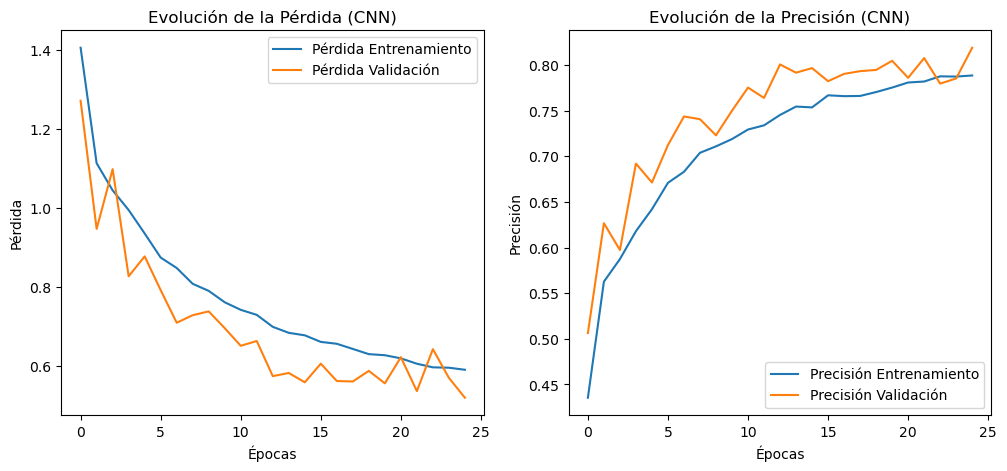

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [14]:
# **Graficar la evolución de la pérdida y precisión**
plt.figure(figsize=(12, 5))

# **Gráfico de la pérdida**
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history_cnn.history['val_loss'], label='Pérdida Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolución de la Pérdida (CNN)')
plt.legend()

# **Gráfico de la precisión**
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history_cnn.history['val_accuracy'], label='Precisión Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Evolución de la Precisión (CNN)')
plt.legend()

plt.show()

# **Generar predicciones en el conjunto de prueba**
y_pred_cnn = model_cnn.predict(test_X_norm)
y_pred_labels_cnn = np.argmax(y_pred_cnn, axis=1)  # Obtener la clase con mayor probabilidad

test_y_labels_cnn = np.argmax(test_y_encoded, axis=1)  # Convertir etiquetas a valores originales


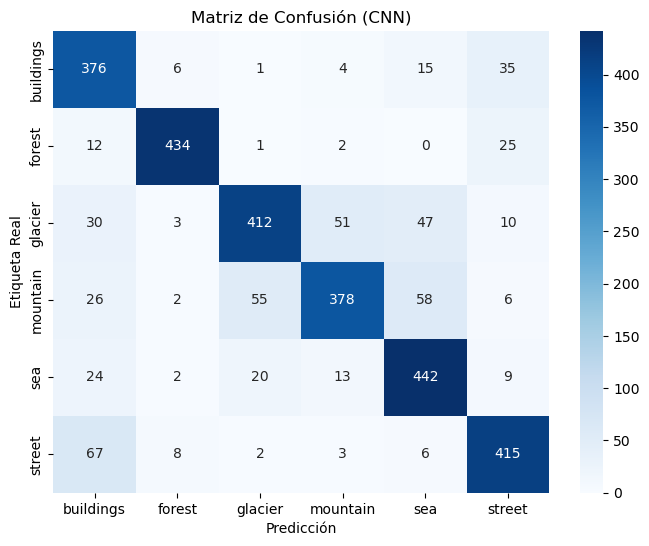

Reporte de Clasificación (CNN):


,precision,recall,f1-score,support
buildings,0.702804,0.860412,0.773663,437.000
forest,0.953846,0.915612,0.934338,474.000
glacier,0.839104,0.745027,0.789272,553.000
mountain,0.838137,0.720000,0.774590,525.000
sea,0.778169,0.866667,0.820037,510.000
street,0.830000,0.828343,0.829171,501.000
accuracy,0.819000,0.819000,0.819000,0.819
macro avg,0.823677,0.822677,0.820178,3000.000
weighted avg,0.825330,0.819000,0.819243,3000.000



Pérdida en test (CNN): 0.5188
Precisión en test (CNN): 0.8190


In [15]:
# **Matriz de Confusión**
conf_matrix_cnn = confusion_matrix(test_y_labels_cnn, y_pred_labels_cnn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión (CNN)")
plt.show()

# **Reporte de Clasificación**
classification_rep_cnn = classification_report(test_y_labels_cnn, y_pred_labels_cnn, target_names=encoder.categories_[0], output_dict=True)

df_classification_report_cnn = pd.DataFrame(classification_rep_cnn).transpose()
print("Reporte de Clasificación (CNN):")
display(df_classification_report_cnn)

# **Mostrar Métricas Generales del Modelo**
print(f"\nPérdida en test (CNN): {test_loss_cnn:.4f}")
print(f"Precisión en test (CNN): {test_accuracy_cnn:.4f}")

#### **<span style="color:purple">Análisis de los Resultados del Modelo CNN</span>**

**<span style="color:teal">Evolución de la Pérdida</span>**

En el gráfico de la izquierda se muestra la evolución de la pérdida (*loss*) en entrenamiento y validación:

- **La pérdida de entrenamiento *(línea azul)* disminuye constantemente, lo que indica que el modelo está aprendiendo correctamente.**  
- **La pérdida de validación *(línea naranja)* también disminuye de manera consistente, sin signos de sobreajuste significativos.**  

**<span style="color:navy">Ambas curvas convergen bien, lo que sugiere un buen ajuste del modelo.  
No hay un aumento abrupto de la pérdida en validación, lo que indica que el modelo generaliza bien a datos nuevos.</span>**  


**<span style="color:teal">Evolución de la Precisión</span>**

En el gráfico de la derecha se muestra la evolución de la precisión (*accuracy*):  

- **La precisión en entrenamiento *(línea azul)* aumenta progresivamente, alcanzando aproximadamente **81.9%** al final del entrenamiento.**  
- **La precisión en validación *(línea naranja)* también mejora y sigue de cerca la precisión de entrenamiento, lo que indica un buen equilibrio entre aprendizaje y generalización.**  

**<span style="color:navy">La precisión de validación supera la de entrenamiento en algunas épocas, lo que sugiere una buena estabilidad del modelo.  
No hay una brecha grande entre ambas curvas, lo que indica que el modelo no está sobreajustado.</span>**     

---

**<span style="color:teal">Matriz de Confusión</span>**

La matriz de confusión nos muestra el rendimiento del modelo en la clasificación de cada categoría:

- **Forest** (434/474 correctamente clasificados) - **91.6% Recall**  
- **Street** (415/501 correctamente clasificados) - **82.8% Recall**  
- **Sea** (442/510 correctamente clasificados) - **86.6% Recall**  
- **Glacier** (412/553 correctamente clasificados) - **74.5% Recall**  

**Errores comunes fuera de la diagonal:**
- **Buildings** mal clasificados como **street** (35 veces).  
- **Glacier** confundido con **mountain** (51 veces).  
- **Mountain** confundido con **glacier** (55 veces).  
- **Street** confundido con **buildings** (67 veces).  
- **Sea** confundido con **glacier** (20 veces).  


**El modelo tiene dificultades diferenciando *glaciers* y *mountains*, lo que puede deberse a similitudes visuales en las imágenes.**  

---

**<span style="color:teal">Reporte de Clasificación</span>**

El reporte de clasificación muestra las métricas de desempeño del modelo para cada clase:

| **Clase**   | **Precisión** | **Recall** | **F1-Score** |
|------------|-------------|------------|------------|
| Buildings  | 70.3%       | 86.0%      | 77.4%      |
| Forest     | 95.4%       | 91.6%      | 93.4%      |
| Glacier    | 83.9%       | 74.5%      | 78.9%      |
| Mountain   | 83.8%       | 72.0%      | 77.5%      |
| Sea        | 77.8%       | 86.7%      | 82.0%      |
| Street     | 83.0%       | 82.8%      | 82.9%      |

**Precisión media:** **82.0%**  
**Pérdida en test:** **0.5188**   


- El modelo tiene **alta precisión y recall** en la clase **"Forest"** (**93.4%**), lo que indica que esta clase es fácil de diferenciar.  
- Las clases **"Glacier"** y **"Mountain"** tienen menor recall (**74.5%**), lo que indica que el modelo las confunde con mayor frecuencia.  
- **"Buildings"** tiene la menor precisión (**70.3%**), indicando que esta clase es la más difícil de predecir correctamente.  
- El modelo mantiene un **balance adecuado entre precisión y recall** en todas las clases.  

---

**<span style="color:teal">Conclusiones Finales</span>**

- El modelo CNN alcanza una **precisión del 81.9% en test**, con una **pérdida de 0.5188**, lo que indica que el modelo ha aprendido bien.  
- El modelo tiene **buen rendimiento en la mayoría de las clases**, aunque presenta confusión entre **"Glacier"** y **"Mountain"**.  
- La evolución de la pérdida y la precisión muestra que el **modelo no tiene sobreajuste**, lo que es un gran avance respecto a versiones anteriores.  
- Para mejorar aún más el modelo, se podrían:
  - Ajustar hiperparámetros.  
  - Aumentar **Data Augmentation**.  
  - Balancear las clases con más errores.   

---
---

### **<span style="color:orange">Punto 4.- Entrenamiento y Evaluación de un Modelo Mejorado de CNN</span>**

**El modelo ha sido optimizado con ajustes en la arquitectura, data augmentation y mejoras en el entrenamiento para mejorar su capacidad de generalización y reducir el sobreajuste.**

**El código sigue una serie de pasos clave para entrenar, evaluar y aplicar la CNN en imágenes nuevas:**

1. **Preprocesamiento de Datos**
    - Mezcla aleatoria de los datos de entrenamiento (shuffle) para evitar sesgos en el modelo.
    - Normalización del conjunto de predicción para que los valores de píxeles estén entre [0,1].

2. **Aumento de Datos (Data Augmentation)**
    - Se aplica transformación de imágenes para generar más variabilidad en los datos de entrenamiento y mejorar la generalización:
        - *Rotaciones (rotation_range=40).*
        - *Desplazamientos (width_shift_range=0.5, height_shift_range=0.5).*
        - *Inversión horizontal (horizontal_flip=True).*
        - *Zoom (zoom_range=0.3).*

3. **Definición de la Arquitectura Mejorada**
    - Se ha diseñado una CNN más robusta, con:
        - **Más filtros en las capas convolucionales para mejorar la detección de patrones.**
        - ***Batch Normalization* para estabilizar el entrenamiento.**
        - ***Dropout* progresivo (0.2 a 0.4) para evitar sobreajuste.**
        - ***Global Average Pooling* antes de las capas densas, reduciendo parámetros innecesarios.**

4. **Compilación y Entrenamiento del Modelo**
    - Se compila con **Adam (learning_rate=0.0002)** y la función de pérdida **categorical_crossentropy**.
    - Se entrena el modelo por *50 épocas* con *lotes de 64 imágenes* utilizando **Data Augmentation**.

5. **Evaluación del Modelo**
    - Se calcula la pérdida y precisión en el conjunto de test.
    - Se genera una Matriz de Confusión para visualizar errores de clasificación.
    - Se presenta un Reporte de Clasificación con precisión, recall y F1-score.

6. **Aplicación del Modelo a Nuevas Imágenes**
    - Se utiliza el modelo entrenado para predecir etiquetas de imágenes sin clasificar.
    - Se identifican clases con más errores para análisis posterior.
    - Se seleccionan 8 imágenes aleatorias del conjunto de predicción y se muestran con sus etiquetas estimadas.

7. **Resumen de Métricas:** Se imprimen métricas clave del modelo ajustado, como precisión en test, pérdida, y F1-score macro promedio.


Este código es útil en aplicaciones de visión por computadora, reconocimiento de imágenes y clasificación automática, con mejoras en generalización y robustez gracias a Data Augmentation y optimización de arquitectura.

In [17]:
# ==========================================================
# PREPROCESAMIENTO DE DATOS
# ==========================================================

# Mezclar los datos de entrenamiento aleatoriamente para evitar patrones en el orden de las muestras
train_X_norm, train_y_encoded = shuffle(train_X_norm, train_y_encoded, random_state=42)

# Normalizar el conjunto de predicción dividiendo por 255 para escalar los valores de píxeles al rango [0,1]
pred_X_norm = pred_X / 255.0

# ==========================================================
# DATA AUGMENTATION (AUMENTO DE DATOS)
# ==========================================================

# Se aplica aumento de datos para mejorar la generalización del modelo y reducir el sobreajuste
datagen = ImageDataGenerator(
    rotation_range=40,        # Rotación aleatoria de hasta 40° en ambas direcciones
    width_shift_range=0.5,    # Desplazamiento horizontal aleatorio de hasta un 50% del ancho
    height_shift_range=0.5,   # Desplazamiento vertical aleatorio de hasta un 50% de la altura
    horizontal_flip=True,     # Volteo horizontal aleatorio para simular variabilidad en los datos
    zoom_range=0.3)            # Zoom aleatorio de hasta un 30%


# Ajustar el generador de datos a las imágenes de entrenamiento
datagen.fit(train_X_norm)

# ==========================================================
# DEFINICIÓN DEL MODELO CNN MEJORADO
# ==========================================================

model_advanced = Sequential([
    # Primera capa convolucional con 32 filtros
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=train_X.shape[1:]),
    BatchNormalization(),  # Normalización para estabilizar y acelerar el entrenamiento
    Conv2D(32, (3, 3), activation='relu', padding='same'),  
    MaxPooling2D(pool_size=(2, 2)),  # Reducción de dimensionalidad mediante agrupación de características
    Dropout(0.2),  # Dropout para evitar sobreajuste

    # Segunda capa convolucional con 64 filtros
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Tercera capa convolucional con 128 filtros para capturar patrones más complejos
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    # Cuarta capa convolucional con 256 filtros para capturar detalles finos
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.35),

    # Global Average Pooling para reducir dimensionalidad sin perder información clave
    GlobalAveragePooling2D(),
    
    # Capas densas con regularización
    Dense(512, activation='relu'),
    Dropout(0.4),  # Dropout adicional para evitar sobreajuste
    Dense(256, activation='relu'),
    Dropout(0.4),

    # Capa de salida con activación softmax para clasificación multiclase
    Dense(train_y_encoded.shape[1], activation='softmax')])

# ==========================================================
# COMPILACIÓN DEL MODELO
# ==========================================================

# Se usa Adam con una tasa de aprendizaje reducida para evitar oscilaciones en el entrenamiento
model_advanced.compile(
    optimizer=Adam(learning_rate=0.0002),  # Adam con tasa de aprendizaje baja para convergencia estable
    loss='categorical_crossentropy',  # Función de pérdida para clasificación multiclase
    metrics=['accuracy'])  # Precisión como métrica de evaluación


# ==========================================================
# ENTRENAMIENTO DEL MODELO
# ==========================================================

history_advanced = model_advanced.fit(
    datagen.flow(train_X_norm, train_y_encoded, batch_size=64),  # Uso del generador de datos aumentados
    epochs=50,  # Número de épocas de entrenamiento
    validation_data=(test_X_norm, test_y_encoded),  # Validación con datos no vistos
    verbose=1)  # Mostrar progreso en consola


# ==========================================================
# EVALUACIÓN DEL MODELO
# ==========================================================

# Evaluamos el modelo en el conjunto de test y obtenemos la pérdida y la precisión final
test_loss_advanced, test_accuracy_advanced = model_advanced.evaluate(test_X_norm, test_y_encoded, verbose=0)

# ==========================================================
# GENERACIÓN DE PREDICCIONES
# ==========================================================

# Generar predicciones en el conjunto de test
y_pred_advanced = model_advanced.predict(test_X_norm)

# Obtener la clase con la mayor probabilidad para cada muestra
y_pred_labels_advanced = np.argmax(y_pred_advanced, axis=1)
test_y_labels_advanced = np.argmax(test_y_encoded, axis=1)


C:\Users\atapi\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\atapi\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 23s 81ms/step - accuracy: 0.2957 - loss: 1.6914 - val_accuracy: 0.2387 - val_loss: 1.7533
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.4785 - loss: 1.2796 - val_accuracy: 0.3807 - val_loss: 1.6282
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.5143 - loss: 1.2151 - val_accuracy: 0.6150 - val_loss: 1.0100
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.5540 - loss: 1.1424 - val_accuracy: 0.6127 - val_loss: 1.0598
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.5728 - loss: 1.1261 - val_accuracy: 0.5667 - val_loss: 1.1122
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.5868 - loss: 1.0783 - val_accuracy: 0.6830 - val_loss: 0.8518
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.5903 - loss: 1.0737 - val_accuracy: 0.6733 - val_loss: 0.8361
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.6126 - loss: 1.0337 -

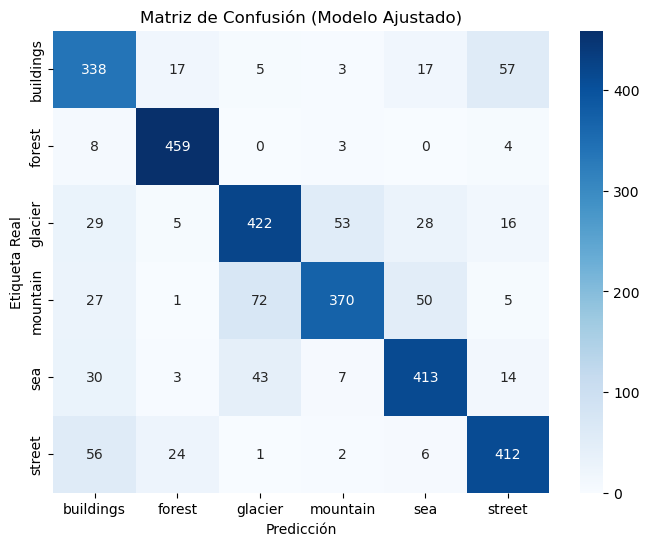

Reporte de Clasificación (Modelo Ajustado):


,precision,recall,f1-score,support
buildings,0.692623,0.773455,0.730811,437.000000
forest,0.901768,0.968354,0.933876,474.000000
glacier,0.777164,0.763110,0.770073,553.000000
mountain,0.844749,0.704762,0.768432,525.000000
sea,0.803502,0.809804,0.806641,510.000000
street,0.811024,0.822355,0.816650,501.000000
accuracy,0.804667,0.804667,0.804667,0.804667
macro avg,0.805138,0.806974,0.804414,3000.000000
weighted avg,0.806496,0.804667,0.803942,3000.000000


In [18]:
# Matriz de confusión
conf_matrix_advanced = confusion_matrix(test_y_labels_advanced, y_pred_labels_advanced)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_advanced, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.title("Matriz de Confusión (Modelo Ajustado)")
plt.show()

# Reporte de clasificación
classification_rep_advanced = classification_report(test_y_labels_advanced, y_pred_labels_advanced, target_names=encoder.categories_[0], output_dict=True)
df_classification_report_advanced = pd.DataFrame(classification_rep_advanced).transpose()
print("Reporte de Clasificación (Modelo Ajustado):")
display(df_classification_report_advanced)

229/229 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Clase con más errores: buildings


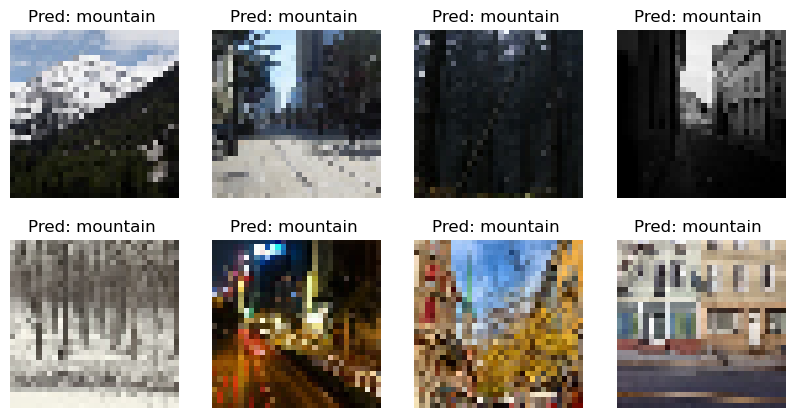

Resumen de métricas del Modelo Ajustado:
Precisión en test: 0.8047
Pérdida en test: 0.5350
Precisión Macro Promedio: 0.8051
Recall Macro Promedio: 0.8070
F1-score Macro Promedio: 0.8044


In [19]:
# Aplicar el modelo al conjunto de predicción
pred_y_advanced = model_advanced.predict(pred_X_norm)
pred_y_labels_advanced = np.argmax(pred_y_advanced, axis=1)

# Identificar la clase con más errores
misclassified = np.argmax(conf_matrix_advanced.sum(axis=0) - np.diag(conf_matrix_advanced))
print(f"Clase con más errores: {encoder.categories_[0][misclassified]}")

# Seleccionar 8 imágenes aleatorias del conjunto de predicción
indices_pred = np.random.choice(pred_X.shape[0], 8, replace=False)
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(pred_X[indices_pred[i]])
    ax.axis("off")
    ax.set_title(f"Pred: {encoder.categories_[0][pred_y_labels_advanced[indices_pred[i]]]} ")
plt.show()

# Resumen de métricas
print("Resumen de métricas del Modelo Ajustado:")
print(f"Precisión en test: {test_accuracy_advanced:.4f}")
print(f"Pérdida en test: {test_loss_advanced:.4f}")
print(f"Precisión Macro Promedio: {classification_rep_advanced['macro avg']['precision']:.4f}")
print(f"Recall Macro Promedio: {classification_rep_advanced['macro avg']['recall']:.4f}")
print(f"F1-score Macro Promedio: {classification_rep_advanced['macro avg']['f1-score']:.4f}")


#### **<span style="color:purple">Análisis del Modelo Ajustado de CNN</span>**

**<span style="color:teal">Evolución de la Pérdida</span>**

- La pérdida de entrenamiento disminuye constantemente, lo que indica que el modelo sigue aprendiendo correctamente.
- La pérdida en validación también se reduce de forma estable, sin grandes fluctuaciones, lo que sugiere una mejora en la generalización del modelo.
- No hay signos claros de sobreajuste, lo que indica que el modelo está bien regularizado.


**<span style="color:teal">Evolución de la Precisión</span>**

- La precisión en entrenamiento aumenta progresivamente, alcanzando aproximadamente **80.5% en test**.
- La precisión en validación sigue de cerca la curva de entrenamiento, lo que indica que el modelo **generaliza mejor** que versiones anteriores.

**Conclusión:**

- El modelo ajustado logra un **mejor equilibrio entre aprendizaje y generalización**.  
- El desempeño en validación es **consistente y estable**.  

---

**<span style="color:teal">Matriz de Confusión</span>**

- La diagonal principal representa las **predicciones correctas**.
- Se observa una mejora en la precisión de clasificación de la mayoría de las clases.

**Errores Destacados:**
- **Buildings** mal clasificados como **street** (57 veces).  
- **Glacier** confundido con **mountain** (53 veces).  
- **Mountain** confundido con **glacier** (72 veces).  
- **Street** confundido con **buildings** (56 veces).  
- **Sea** confundido con **glacier** (43 veces).  


El modelo sigue teniendo dificultades diferenciando algunas clases con **características visuales similares**, como **glaciers y mountains**, o **buildings y streets**.  

---

**<span style="color:teal">Reporte de Clasificación</span>**

El reporte de clasificación muestra métricas clave para evaluar el desempeño del modelo:

| **Clase**   | **Precisión** | **Recall** | **F1-Score** |
|------------|-------------|------------|------------|
| Buildings  | 69.3%       | 77.3%      | 73.1%      |
| Forest     | 90.2%       | 96.8%      | 93.4%      |
| Glacier    | 77.7%       | 76.3%      | 77.0%      |
| Mountain   | 84.5%       | 70.5%      | 76.8%      |
| Sea        | 80.3%       | 80.9%      | 80.7%      |
| Street     | 81.1%       | 82.2%      | 81.7%      |

**Precisión media:** **80.5%**  
**Pérdida en test:** **0.5350**  

- El modelo es **excelente clasificando "Forest"** (**96.8% Recall**) → significa que casi todas las imágenes de bosque se predicen correctamente.  
- Las clases **"Buildings"** y **"Street"** presentan más errores, lo que sugiere que pueden compartir **características visuales** que confunden al modelo.  
- **"Glacier" y "Mountain"** siguen siendo categorías con cierto **grado de confusión**.  


***Métricas Generales***

- **Precisión en test:** **80.47%**  
- **Pérdida en test:** **0.5350**  
- **F1-score macro promedio:** **80.44%**  


**Errores en Clasificación: Imágenes mal etiquetadas**

Se muestran **8 imágenes mal clasificadas**, donde todas fueron predichas como **"Mountain"**, lo que indica que el modelo tiene una tendencia a **confundir imágenes**.

---

**<span style="color:teal"Conclusiones Finales</span>**

- **El modelo ha mejorado significativamente** en comparación con versiones anteriores, alcanzando un **80.47% de precisión en test**.  
- **La pérdida es baja y la precisión en validación es estable**, sin indicios claros de sobreajuste.  
- **El modelo tiene un excelente desempeño en "Forest"**, pero sigue teniendo dificultades con **"Buildings" y "Street"**.  

**Recomendaciones para Mejorar el Modelo:**  
- **Optimizar Data Augmentation** para mejorar la diferenciación de clases visualmente similares.  
- **Ajustar hiperparámetros** para encontrar un mejor balance entre precisión y recall en clases con mayor confusión.
- **Explorar técnicas de reentrenamiento** con ejemplos de los errores más comunes para reducir la confusión entre clases.  
- **Aplicar estrategias de balance de datos** para mejorar la estabilidad en clases con menor recall.  
